<a href="https://colab.research.google.com/github/ecemboluk/Patika-Python-Temel-Projesi/blob/main/Energy_Efficiency_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from google.colab import drive

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train and Test Split - Metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Create Model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Colab Notebooks"

In [10]:
!kaggle datasets download -d elikplim/eergy-efficiency-dataset

  0% 0.00/6.22k [00:00<?, ?B/s]
100% 6.22k/6.22k [00:00<00:00, 846kB/s]


In [12]:
!unzip \*.zip  && rm *.zip

Archive:  eergy-efficiency-dataset.zip
  inflating: ENB2012_data.csv        


In [13]:
data = pd.read_csv("ENB2012_data.csv")
data.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [15]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


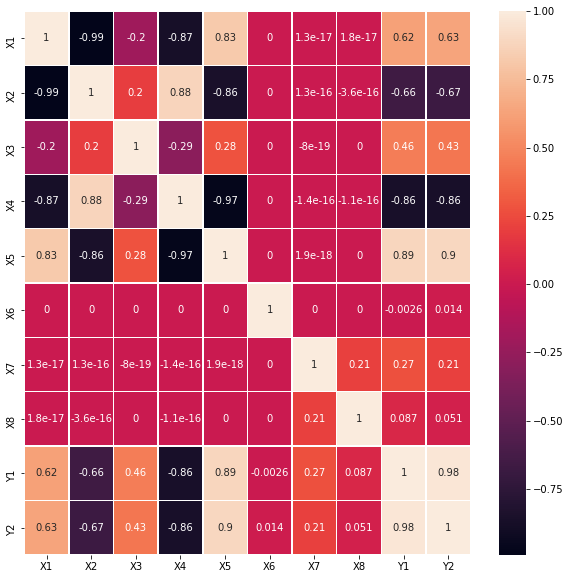

In [16]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True, linewidths=.5, ax=ax)
plt.show()

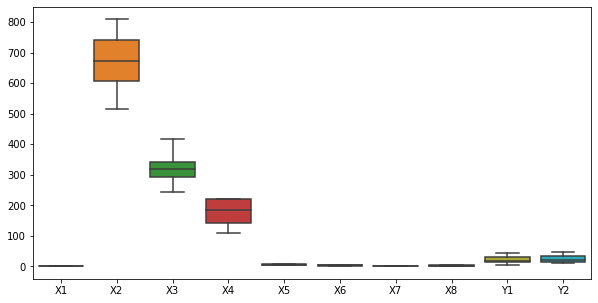

In [17]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=data)
plt.show()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(["Y1","Y2"],axis=1),data.loc[:,["Y1","Y2"]], test_size=0.2,random_state=42)
print("X_train",x_train.shape)
print("X_test",x_test.shape)
print("Y_train",y_train.shape)
print("Y_test",y_test.shape)

X_train (614, 8)
X_test (154, 8)
Y_train (614, 2)
Y_test (154, 2)


In [19]:
lr = LinearRegression()
lr.fit(x_train, y_train)
prediction = lr.predict(x_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, prediction, multioutput='raw_values'))
print("Multi Linear Regression RMSE for Y1 output ",rmse_lr[0], " and Y2 output", rmse_lr[1])

Multi Linear Regression RMSE for Y1 output  3.0293266342179406  and Y2 output 3.1442076203043205


In [20]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train) 
prediction = dt.predict(x_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, prediction, multioutput='raw_values'))
print("Decision Tree Regression RMSE for Y1 output ",rmse_dt[0], " and Y2 output", rmse_dt[1])

Decision Tree Regression RMSE for Y1 output  0.6011720154895706  and Y2 output 2.319894058261808


In [21]:
rf = RandomForestRegressor(random_state=42, max_features='auto', max_depth=10, n_estimators= 100) 
rf.fit(x_train,y_train) 
prediction = rf.predict(x_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, prediction, multioutput='raw_values'))
print("Random Forrest Regression RMSE for Y1 output ",rmse_rf[0], " and Y2 output", rmse_rf[1])

Random Forrest Regression RMSE for Y1 output  0.4972846399344466  and Y2 output 1.9019458347193232
